1. Perform correlation analysis on PM2.5 data obtained from the provinces of Kanchanaburi, Rayong and Narathiwat. Display the correlation matrix using plasma colormap.

2. Perform year-wise trend of line plot for all the data

3. Display a pie chart with explosion on any of the data with 0-50 as normal 50-100 moderate and 100+ for abnormal

Data is listed below:

Kanchanaburi
https://raw.githubusercontent.com/ferdinjoe/DSA206/main/kanchanaburi_pm25.csv

Rayong
https://raw.githubusercontent.com/ferdinjoe/DSA206/main/rayongmaptaphut_pm25.csv

Narathiwat
https://raw.githubusercontent.com/ferdinjoe/DSA206/main/narathiwat_pm25.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
kdf = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/kanchanaburi_pm25.csv')
rdf = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/rayongmaptaphut_pm25.csv')
ndf = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/narathiwat_pm25.csv')

# Understading the data

In [3]:
kdf

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0
...,...,...,...,...,...,...,...
23803,2019,2,7,5,35.0,45,0
23804,2019,2,7,6,35.0,45,0
23805,2019,2,7,7,42.0,56,0
23806,2019,2,7,8,47.0,64,0


In [4]:
rdf

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,40.6,1,0
1,2016,3,3,9,40.6,1,0
2,2016,3,3,10,40.6,1,0
3,2016,3,3,11,40.6,1,0
4,2016,3,3,12,38.7,1,0
...,...,...,...,...,...,...,...
23807,2019,2,7,5,18.0,40,0
23808,2019,2,7,6,27.0,42,0
23809,2019,2,7,7,20.0,37,0
23810,2019,2,7,8,29.0,34,0


In [5]:
ndf

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0
...,...,...,...,...,...,...,...
23810,2019,2,7,5,15.0,21,0
23811,2019,2,7,6,12.0,24,0
23812,2019,2,7,7,12.0,26,0
23813,2019,2,7,8,20.0,29,0


In [6]:
kdf.describe()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
count,23808.000000,23808.000000,23808.000000,23808.000000,23808.000000,23808.000000,23808.0
mean,2017.126260,6.646757,15.737105,11.477697,24.297442,2.969128,0.0
std,0.875125,3.405100,8.882584,6.923837,16.734309,14.955765,0.0
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,2016.000000,4.000000,8.000000,5.000000,12.100000,0.000000,0.0
50%,2017.000000,7.000000,16.000000,11.000000,19.400000,0.000000,0.0
75%,2018.000000,10.000000,23.000000,17.000000,31.800000,0.000000,0.0
max,2019.000000,12.000000,31.000000,23.000000,138.900000,150.000000,0.0


In [7]:
rdf.describe()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
count,23812.000000,23812.000000,23812.000000,23812.000000,23812.000000,23812.000000,23812.0
mean,2017.126575,6.646691,15.738241,11.479170,20.072153,3.387830,0.0
std,0.875149,3.404774,8.883228,6.924585,12.836449,14.854177,0.0
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,2016.000000,4.000000,8.000000,5.000000,11.100000,0.000000,0.0
50%,2017.000000,7.000000,16.000000,11.000000,16.900000,1.000000,0.0
75%,2018.000000,10.000000,23.000000,17.000000,25.700000,1.000000,0.0
max,2019.000000,12.000000,31.000000,23.000000,116.600000,165.000000,0.0


In [8]:
ndf.describe()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
count,23815.000000,23815.000000,23815.000000,23815.000000,23815.000000,23815.000000,23815.0
mean,2017.126517,6.646819,15.738946,11.478774,24.595347,1.922906,0.0
std,0.875125,3.404681,8.883521,6.925090,13.573874,7.734809,0.0
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,2016.000000,4.000000,8.000000,5.000000,14.900000,0.000000,0.0
50%,2017.000000,7.000000,16.000000,11.000000,21.000000,1.000000,0.0
75%,2018.000000,10.000000,23.000000,17.000000,30.900000,1.000000,0.0
max,2019.000000,12.000000,31.000000,23.000000,115.400000,142.000000,0.0


In [9]:
kdf.isnull().sum()

Year             0
Month            0
Day              0
UTC Hour         0
PM2.5            0
PM10_mask        0
Retrospective    0
dtype: int64

In [10]:
rdf.isnull().sum()

Year             0
Month            0
Day              0
UTC Hour         0
PM2.5            0
PM10_mask        0
Retrospective    0
dtype: int64

In [11]:
ndf.isnull().sum()

Year             0
Month            0
Day              0
UTC Hour         0
PM2.5            0
PM10_mask        0
Retrospective    0
dtype: int64

# pm2.5 data of 3 provinces into 1 dataframe

In [12]:
pm_data = pd.DataFrame({'kdf_pm':kdf['PM2.5'],
                        'rdf_pm':rdf['PM2.5'],
                        'ndf_pm':ndf['PM2.5']})
pm_data

,kdf_pm,rdf_pm,ndf_pm
0,65.2,40.6,62.9
1,65.2,40.6,62.9
2,64.9,40.6,55.5
3,64.9,40.6,55.5
4,38.4,38.7,47.9
...,...,...,...
23810,NaN,29.0,15.0
23811,NaN,22.0,12.0
23812,NaN,NaN,12.0
23813,NaN,NaN,20.0


In [13]:
pm_data.describe()

,kdf_pm,rdf_pm,ndf_pm
count,23808.000000,23812.000000,23815.000000
mean,24.297442,20.072153,24.595347
std,16.734309,12.836449,13.573874
min,0.000000,0.000000,0.000000
25%,12.100000,11.100000,14.900000
50%,19.400000,16.900000,21.000000
75%,31.800000,25.700000,30.900000
max,138.900000,116.600000,115.400000


# Correlations analysis on pm2.5 data

In [14]:
pm_data.corr()

,kdf_pm,rdf_pm,ndf_pm
kdf_pm,1.000000,0.665913,0.631500
rdf_pm,0.665913,1.000000,0.545193
ndf_pm,0.631500,0.545193,1.000000


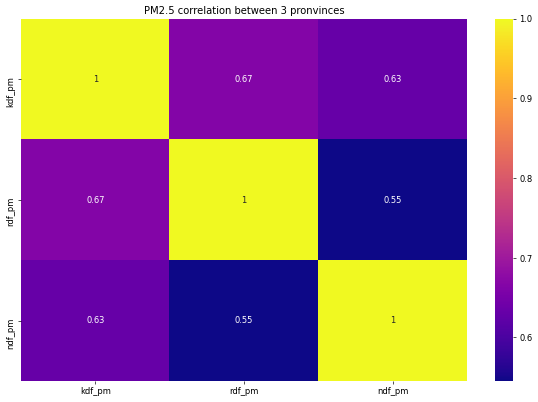

In [16]:
plt.figure(figsize=(12,8), dpi=60)  

sns.heatmap(pm_data.corr(),annot = True, cmap = 'plasma')
plt.title('PM2.5 correlation between 3 pronvinces')
plt.show()

# Trend in year-wise

In [17]:
new_df = pd.concat([kdf,rdf,ndf], axis = 0)
new_df

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0
...,...,...,...,...,...,...,...
23810,2019,2,7,5,15.0,21,0
23811,2019,2,7,6,12.0,24,0
23812,2019,2,7,7,12.0,26,0
23813,2019,2,7,8,20.0,29,0


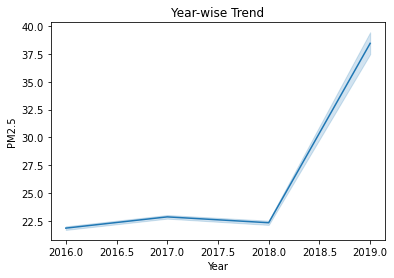

In [18]:
sns.lineplot(data=new_df, x="Year", y="PM2.5")
plt.title('Year-wise Trend')
plt.show()

# Piechart 

In [19]:
kdf['PM2.5'].describe()

count    23808.000000
mean        24.297442
std         16.734309
min          0.000000
25%         12.100000
50%         19.400000
75%         31.800000
max        138.900000
Name: PM2.5, dtype: float64

In [20]:
kdf['bins'] =  pd.cut(kdf['PM2.5'],bins=[0,50,100,150])
kdf['bins'].value_counts()

(0, 50]       21929
(50, 100]      1796
(100, 150]       77
Name: bins, dtype: int64

In [21]:
bin_labels = ['Normal','Moderate','Abnormal']
kdf['bins'] =  pd.cut(kdf['PM2.5'],bins=[0,50,100,150])
kdf['range'] = pd.cut(kdf['PM2.5'],bins=[0,50,100,150],labels=bin_labels)
kdf.head()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective,bins,range
0,2016,3,3,8,65.2,1,0,"(50, 100]",Moderate
1,2016,3,3,9,65.2,1,0,"(50, 100]",Moderate
2,2016,3,3,10,64.9,1,0,"(50, 100]",Moderate
3,2016,3,3,11,64.9,1,0,"(50, 100]",Moderate
4,2016,3,3,12,38.4,1,0,"(0, 50]",Normal


In [22]:
pie_data = kdf.groupby(by = kdf['range']).sum()
pie_data

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
range,,,,,,,
Normal,44232063,151458,345514,250575,454564.6,21778,0
Moderate,3624117,6678,27213,22078,115366.3,41275,0
Abnormal,155448,100,1882,550,8542.6,7636,0


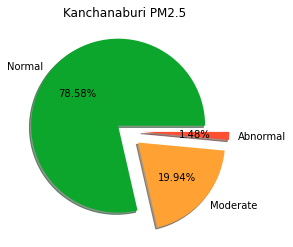

In [23]:
color = ['#0CA62C','#FFA233','#FF4F33']
explode = [0.1,0.2,0.2]
plt.pie(pie_data['PM2.5'],
        labels = bin_labels,
        explode = explode,
        colors = color,
        autopct='%1.2f%%',
        shadow=True)
plt.title('Kanchanaburi PM2.5')

plt.show()